In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:


NETFLIX = 'netflix_titles.csv'
RATING_MAP = {
    'A': 'R',
    'UR': 'NR',
    'TV-Y7-FV': 'TV-Y7',
}
USECOLS = ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

df = pd.read_csv(filepath_or_buffer=NETFLIX, encoding='iso8859_10', usecols=USECOLS, index_col=['show_id'], )
df['rating'] = df['rating'].apply(func=lambda x: x if x not in RATING_MAP.keys() else RATING_MAP[x])
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
movies = df[df['type'] == 'Movie']
series = df[df['type'] == 'TV Show']
#to make sure there isn't any other type other than movies and tv shows
filtered_df = df.query("type != 'Movie' & type != 'TV Show'")
filtered_df.shape
series.shape


(2677, 11)

In [5]:
#series.groupby()
series.fillna('Not Specified/mostly USA', inplace=True)
series.columns

C:\Users\obadz\AppData\Local\Temp\ipykernel_16776\1632068610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series.fillna('Not Specified/mostly USA', inplace=True)


Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

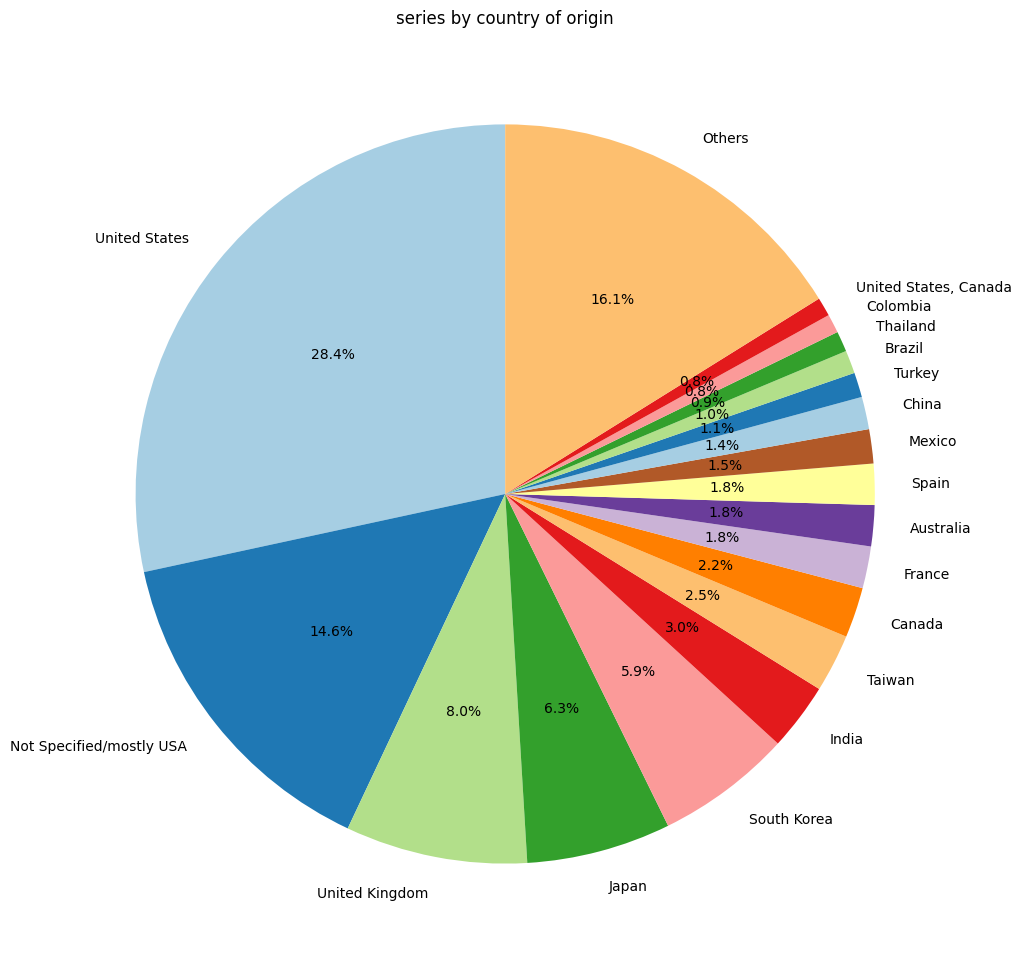

In [6]:
name_counts = series['country'].value_counts()

total = name_counts.sum()
name_percentages = (name_counts / total) * 100

# Filter small categories and sum them into 'Others'
threshold = 0.75
small_categories = name_percentages < threshold
other_countries = name_percentages[small_categories].sum()
large_categories = name_percentages[~small_categories]

# If there are any small categories, add 'Others'
if other_countries > 0:
    large_categories['Others'] = other_countries


# Create a pie chart
plt.figure(figsize=(12,12)) 
plt.pie(large_categories, labels=large_categories.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('series by country of origin')
plt.show()

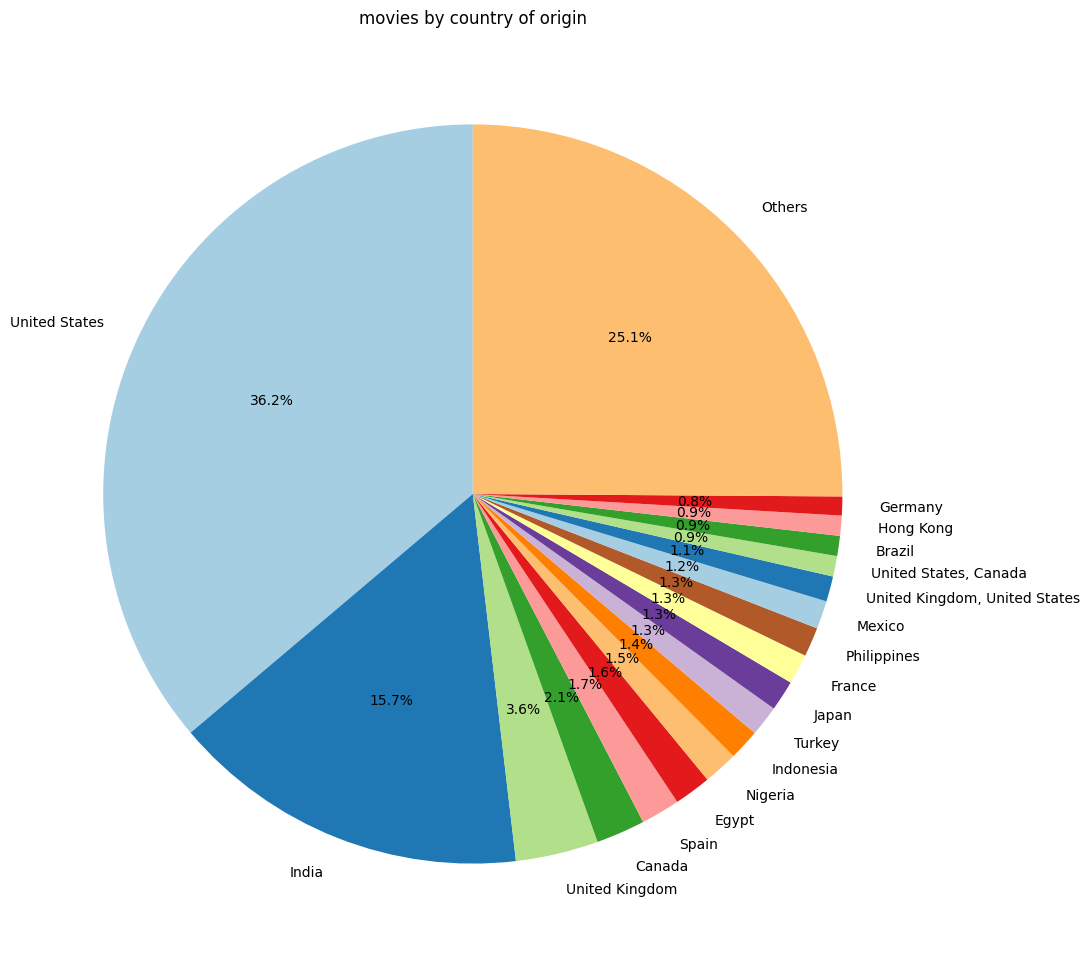

In [7]:
name_counts = movies['country'].value_counts()

total = name_counts.sum()
name_percentages = (name_counts / total) * 100

# Filter small categories and sum them into 'Others'
threshold = 0.75
small_categories = name_percentages < threshold
other_countries = name_percentages[small_categories].sum()
large_categories = name_percentages[~small_categories]

# If there are any small categories, add 'Others'
if other_countries > 0:
    large_categories['Others'] = other_countries


# Create a pie chart
plt.figure(figsize=(12,12)) 
plt.pie(large_categories, labels=large_categories.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('movies by country of origin')
plt.show()

In [8]:
#Catagories = df["listed_in"]
df["listed_in"] = df["listed_in"].str.split(', ')
Catagories_ex = df['listed_in'].explode()

unique_words = set(Catagories_ex)
print(unique_words)

unique_word_count = Catagories_ex.nunique()
print(f'Unique word count: {unique_word_count}')



{'Dramas', 'TV Comedies', 'Cult Movies', 'Horror', 'Crime TV Shows', "Kids' TV", 'Teen TV Shows', 'TV Horror', 'TV Shows', 'Independent Movies', 'Sports Movies', 'Sci-Fi & Fantasy', 'Sci-fi', 'Thrillers', 'Stand-Up Comedy', 'Anime Series', 'TV Action & Adventure', 'Korean TV Shows', 'Romantic Movies', 'Thriller', 'Comedies', 'Docuseries', 'Music & Musicals', 'TV Sci-Fi & Fantasy', 'Faith & Spirituality', 'International TV Shows', 'Stand-Up Comedy & Talk Shows', 'Romance', 'Documentaries', 'LGBTQ Movies', 'Movies', 'Classic & Cult TV', 'British TV Shows', 'TV Thrillers', 'Drama', 'TV Dramas', 'Children & Family Movies', 'Spanish-Language TV Shows', 'Reality TV', 'International Movies', 'Classic Movies', 'TV Mysteries', 'Horror Movies', 'Science & Nature TV', 'Action & Adventure', 'Action', 'Anime Features', 'Romantic TV Shows'}
Unique word count: 48


In [9]:
exploded_df = df.explode('listed_in')

dummies = pd.get_dummies(exploded_df['listed_in'])

categories_encoded = dummies.groupby(dummies.index).sum()
df_encoded = pd.concat([df, categories_encoded], axis=1)
catagories  = df_encoded.iloc[:, 12:]
value = catagories.sum().sort_values(ascending=0)


C:\Users\obadz\AppData\Local\Temp\ipykernel_16776\2703066556.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(value.index, rotation=45, ha='right')


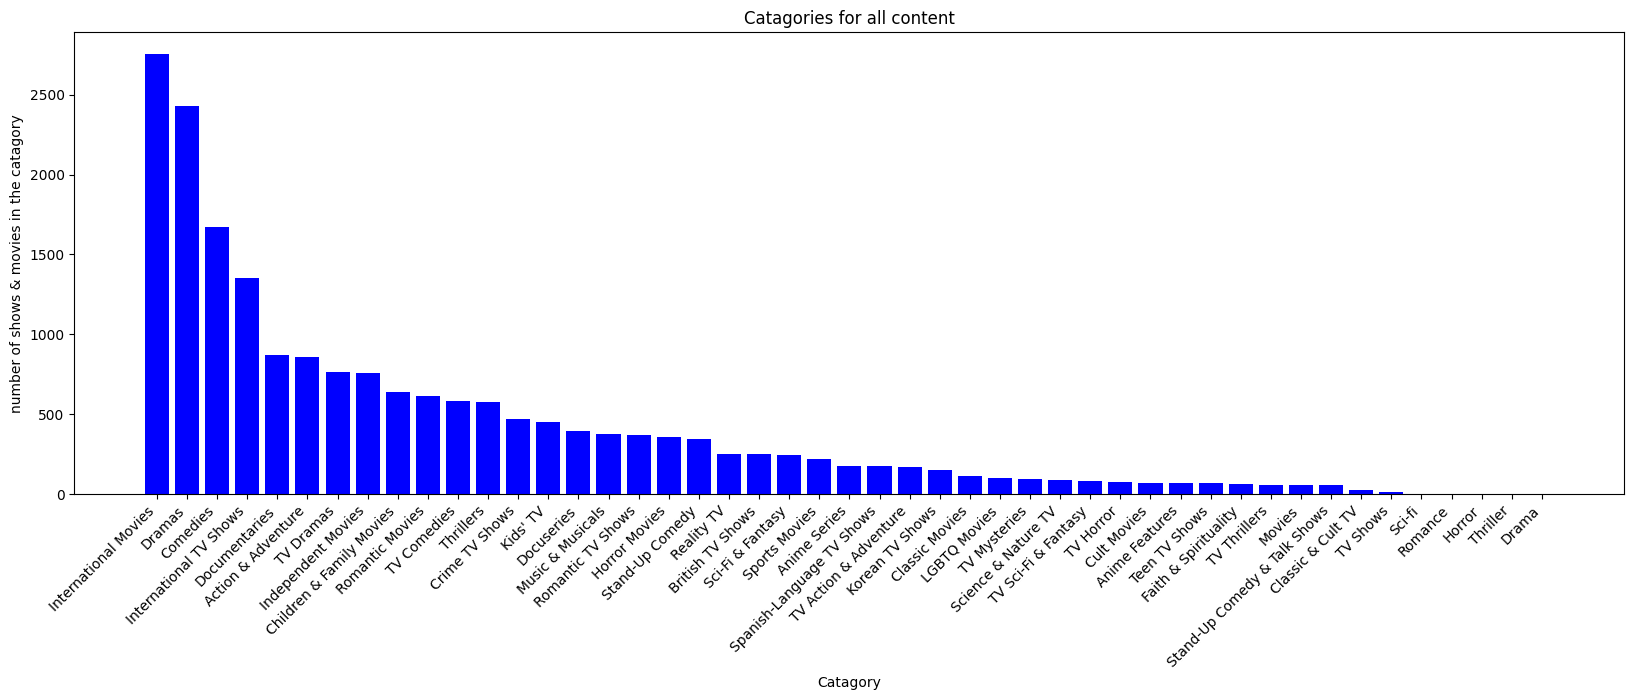

In [10]:

fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(value.index, value, color='blue')  
ax.set_xticklabels(value.index, rotation=45, ha='right')  

ax.set_title('Catagories for all content')
ax.set_xlabel('Catagory')
ax.set_ylabel('number of shows & movies in the catagory')

plt.show()


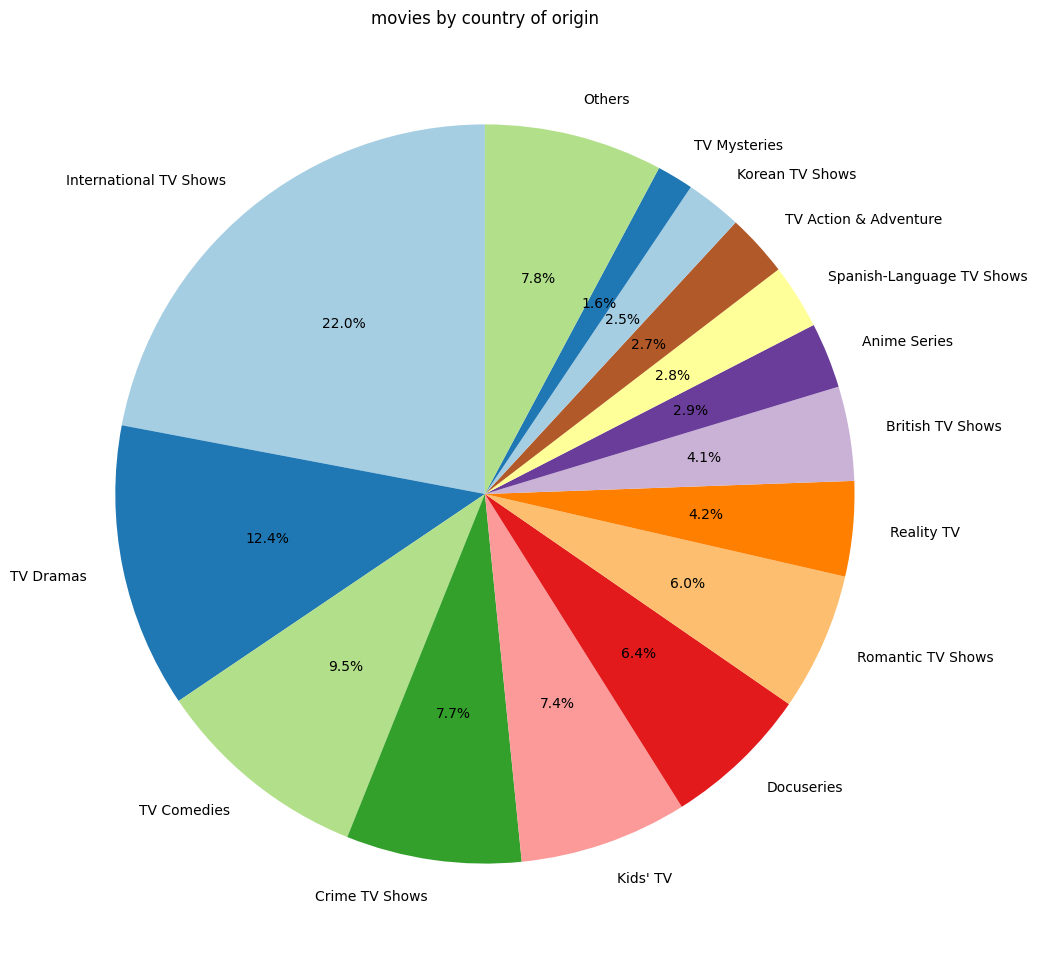

In [30]:
name_counts = value

total = name_counts.sum()
name_percentages = (name_counts / total) * 100

# Filter small categories and sum them into 'Others'
threshold = 1.5
small_categories = name_percentages < threshold
other_countries = name_percentages[small_categories].sum()
large_categories = name_percentages[~small_categories]

# If there are any small categories, add 'Others'
if other_countries > 0:
    large_categories['Others'] = other_countries


# Create a pie chart
plt.figure(figsize=(12,12)) 
plt.pie(large_categories, labels=large_categories.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Catagories for all content as a percentage')
plt.show()

In [13]:
movies["listed_in"] = movies["listed_in"].str.split(', ')
Catagories_ex = movies['listed_in'].explode()

unique_words = set(Catagories_ex)
print(unique_words)

unique_word_count = Catagories_ex.nunique()
print(f'Unique word count: {unique_word_count}')

exploded_df = movies.explode('listed_in')

dummies = pd.get_dummies(exploded_df['listed_in'])

categories_encoded = dummies.groupby(dummies.index).sum()
df_encoded = pd.concat([movies, categories_encoded], axis=1)
catagories  = df_encoded.iloc[:, 12:]
value = catagories.sum().sort_values(ascending=0)


{'Dramas', 'Cult Movies', 'Independent Movies', 'Sports Movies', 'Sci-Fi & Fantasy', 'Thrillers', 'Stand-Up Comedy', 'Romantic Movies', 'Thriller', 'Comedies', 'Faith & Spirituality', 'Music & Musicals', 'Romance', 'Documentaries', 'LGBTQ Movies', 'Movies', 'Drama', 'Children & Family Movies', 'International Movies', 'Classic Movies', 'Horror Movies', 'Action & Adventure', 'Anime Features'}
Unique word count: 23


C:\Users\obadz\AppData\Local\Temp\ipykernel_16776\915330931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["listed_in"] = movies["listed_in"].str.split(', ')


C:\Users\obadz\AppData\Local\Temp\ipykernel_16776\2948576387.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(value.index, rotation=45, ha='right')


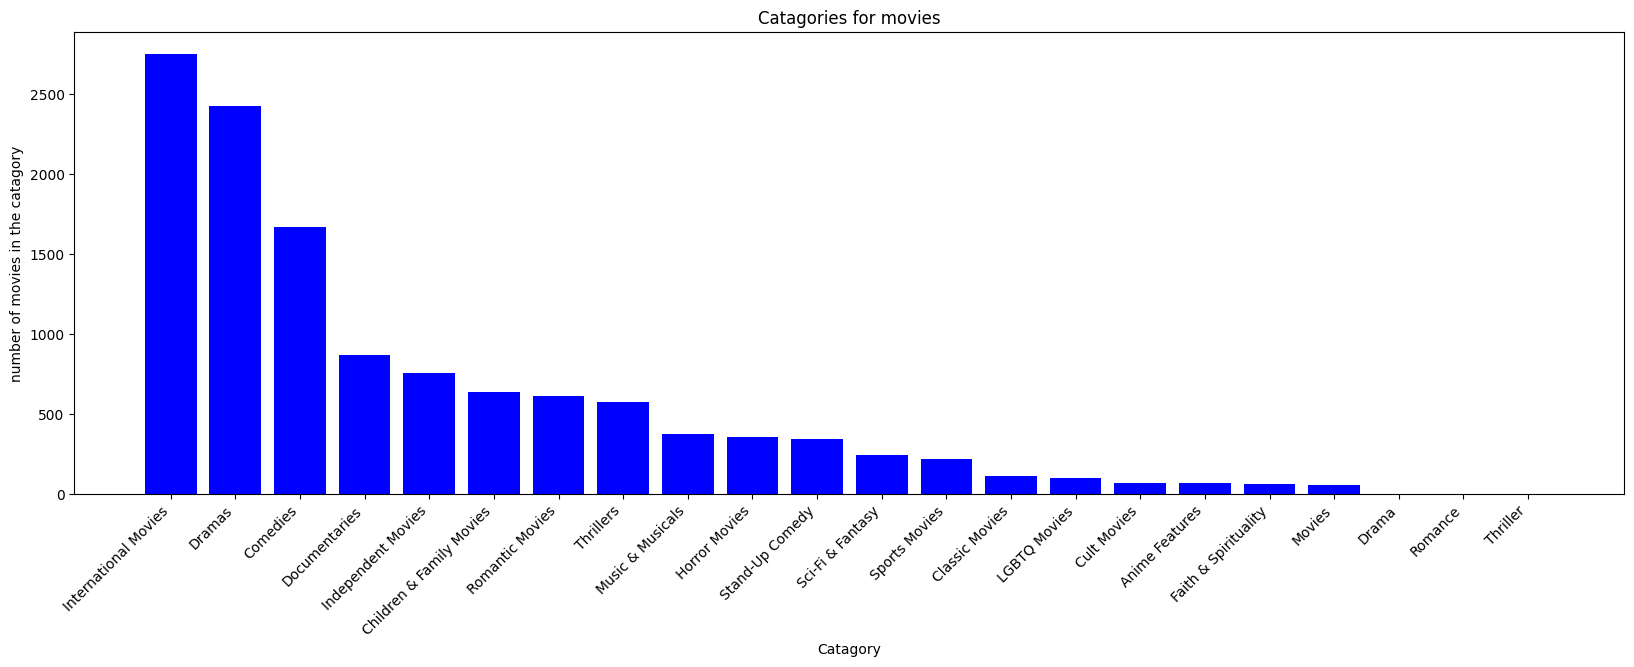

In [14]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(value.index, value, color='blue')  
ax.set_xticklabels(value.index, rotation=45, ha='right')  

ax.set_title('Catagories for movies')
ax.set_xlabel('Catagory')
ax.set_ylabel('number of movies in the catagory')

plt.show()

In [15]:
series["listed_in"] = series["listed_in"].str.split(', ')
Catagories_ex = series['listed_in'].explode()

unique_words = set(Catagories_ex)
print(unique_words)

unique_word_count = Catagories_ex.nunique()
print(f'Unique word count: {unique_word_count}')

exploded_df = series.explode('listed_in')

dummies = pd.get_dummies(exploded_df['listed_in'])

categories_encoded = dummies.groupby(dummies.index).sum()
df_encoded = pd.concat([series, categories_encoded], axis=1)
catagories  = df_encoded.iloc[:, 12:]
value = catagories.sum().sort_values(ascending=0)


{'TV Comedies', 'Horror', 'Crime TV Shows', "Kids' TV", 'Teen TV Shows', 'TV Horror', 'TV Shows', 'Sci-fi', 'Anime Series', 'TV Action & Adventure', 'Korean TV Shows', 'Docuseries', 'TV Sci-Fi & Fantasy', 'International TV Shows', 'Stand-Up Comedy & Talk Shows', 'Classic & Cult TV', 'British TV Shows', 'TV Thrillers', 'TV Dramas', 'Spanish-Language TV Shows', 'Reality TV', 'TV Mysteries', 'Science & Nature TV', 'Action', 'Romantic TV Shows'}
Unique word count: 25


C:\Users\obadz\AppData\Local\Temp\ipykernel_16776\1670408985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series["listed_in"] = series["listed_in"].str.split(', ')


C:\Users\obadz\AppData\Local\Temp\ipykernel_16776\4240785754.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(value.index, rotation=45, ha='right')


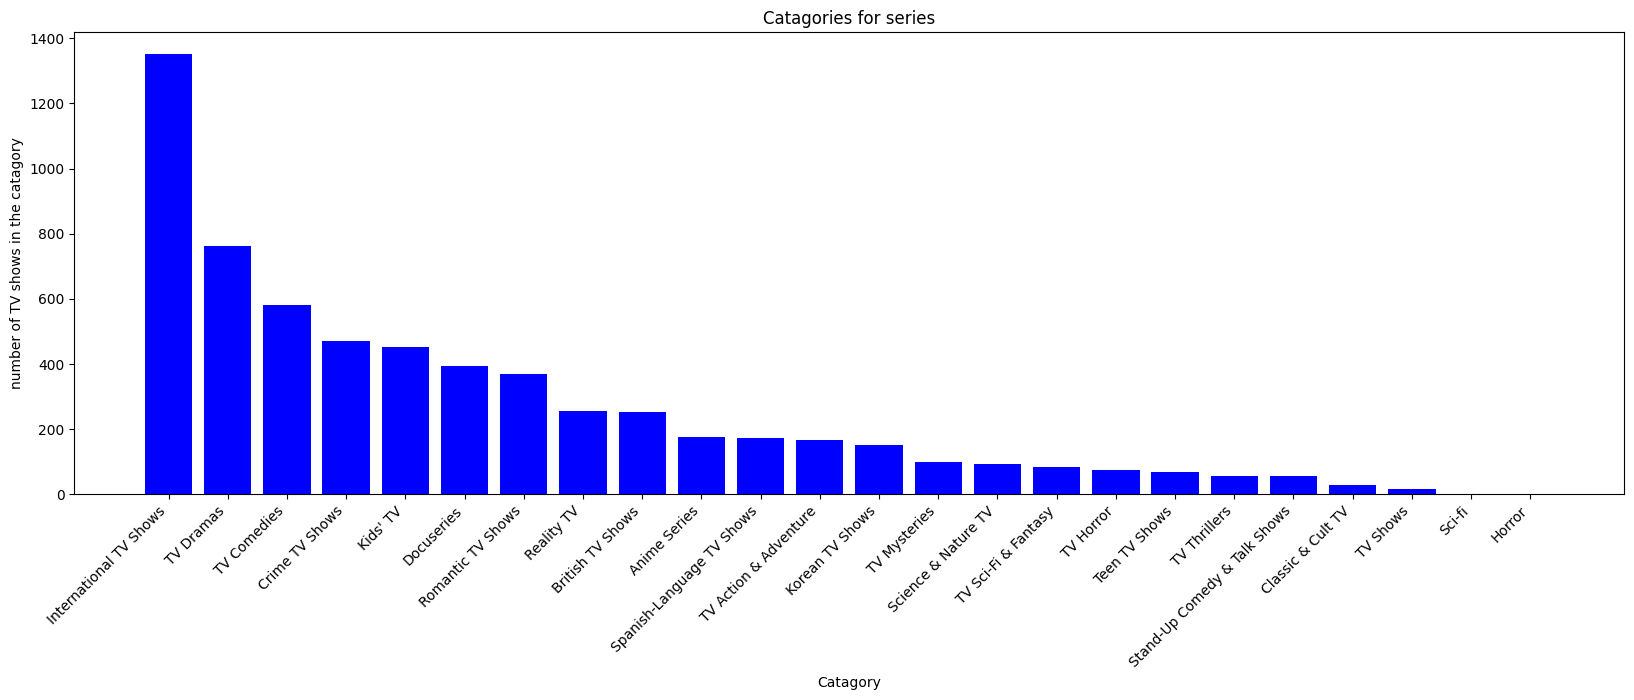

In [16]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(value.index, value, color='blue')  
ax.set_xticklabels(value.index, rotation=45, ha='right')  

ax.set_title('Catagories for series')
ax.set_xlabel('Catagory')
ax.set_ylabel('number of TV shows in the catagory')

plt.show()